<a href="https://colab.research.google.com/github/kassiossouza/cursosDataScience/blob/master/Python_Scikit_Learn_Regress%C3%A3o%2C_Classifica%C3%A7%C3%A3o_e_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 01 O Que é a Regressão**

In [1]:
import pandas as pd

In [2]:
passageiros = pd.read_csv("passageiros.csv")

In [3]:
passageiros.head(10)

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
5,1949.416667,135
6,1949.500000,148
7,1949.583333,148
8,1949.666667,136
9,1949.750000,119


In [4]:
passageiros.head(-1)

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
138,1960.500000,622
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461


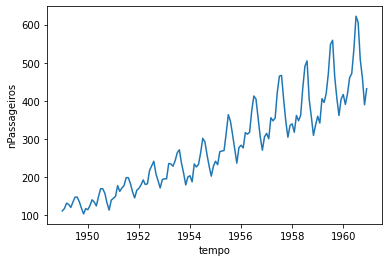

In [5]:
import seaborn as sns

sns.lineplot(x = "tempo", y = "nPassageiros", data = passageiros)

In [6]:
tempo = passageiros.iloc[:,:-1].values

In [7]:
nPassageiros = passageiros.iloc[:,1].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
tempo_treino, tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(tempo, nPassageiros, test_size = 0.3)

In [10]:
from sklearn import linear_model

In [11]:
regressor = linear_model.LinearRegression()

In [12]:
regressor.fit(tempo_treino, nPassageiros_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
nPassageiros_predito = regressor.predict(tempo_teste)

In [14]:
import numpy as np

In [15]:
passageiros_predito = pd.DataFrame({'tempo': np.ndarray.flatten(tempo_teste), 'nPassageiros': nPassageiros_predito})

In [16]:
passageiros_teste = pd.DataFrame({'tempo': np.ndarray.flatten(tempo_teste), 'nPassageiros': nPassageiros_teste})

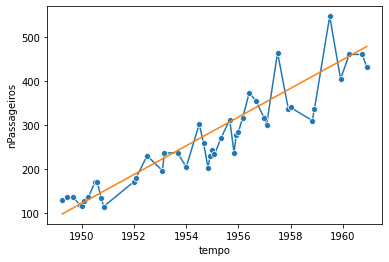

In [17]:
sns.lineplot(x = 'tempo', y = 'nPassageiros', data = passageiros_teste, marker = 'o')
sns.lineplot(x = 'tempo', y = 'nPassageiros', data = passageiros_predito)

# **Aula 02 Regressão Com SVMs**

In [18]:
regressor.coef_ #Coeficiente angular

array([32.71782699])

In [19]:
regressor.intercept_ #Coeficiente linear

-63677.96731185739

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(nPassageiros_teste, nPassageiros_predito)

0.8314606542903015

In [22]:
from sklearn.svm import SVR

In [23]:
regressor_svr = SVR()

In [24]:
regressor_svr = SVR(C = 1000000)

In [25]:
regressor_svr.fit(tempo_treino, nPassageiros_treino)

SVR(C=1000000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [26]:
nPassageiros_predito_svr = regressor_svr.predict(tempo_teste)

In [27]:
passageiros_predito_svr = pd.DataFrame({'tempo': np.ndarray.flatten(tempo_teste), 'nPassageiros': nPassageiros_predito_svr})

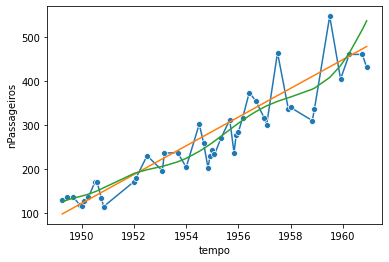

In [28]:
sns.lineplot(x = 'tempo', y = 'nPassageiros', data = passageiros_teste, marker = 'o')
sns.lineplot(x = 'tempo', y = 'nPassageiros', data = passageiros_predito)
sns.lineplot(x = 'tempo', y = 'nPassageiros', data = passageiros_predito_svr)

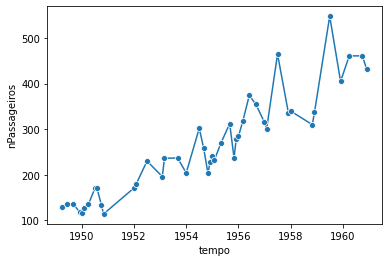

In [29]:
imgGrafico1 = sns.lineplot(x = 'tempo', y = 'nPassageiros', data = passageiros_teste, marker = 'o').get_figure()
imgGrafico1.savefig('img_grafico_1.png')

In [30]:
r2_score(nPassageiros_teste, nPassageiros_predito_svr)

0.8402910791265862

In [31]:
r2_score(nPassageiros_teste, nPassageiros_predito)

0.8314606542903015

# **Aula 03 Classificação**

In [32]:
celular = pd.read_csv("celular.csv", delimiter = ",")

In [33]:
celular.head(10)

,salario,economias,idade,dividas,plano
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


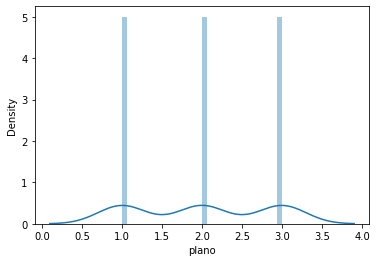

In [34]:
sns.distplot(celular["plano"], bins = 30)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


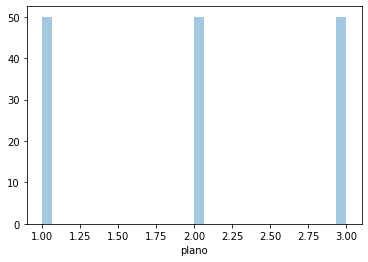

In [35]:
  sns.distplot(celular["plano"], bins = 30, kde = False)

In [36]:
x = celular.iloc[:,:-1].values

In [37]:
y = celular.iloc[:,4].values

In [38]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)

In [39]:
from sklearn import tree
classificador_arvore = tree.DecisionTreeClassifier()

In [40]:
classificador_arvore

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
classificador_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
import graphviz

In [43]:
dot_data = tree.export_graphviz(classificador_arvore, filled = True, out_file = None)

In [44]:
grafico = graphviz.Source(dot_data)

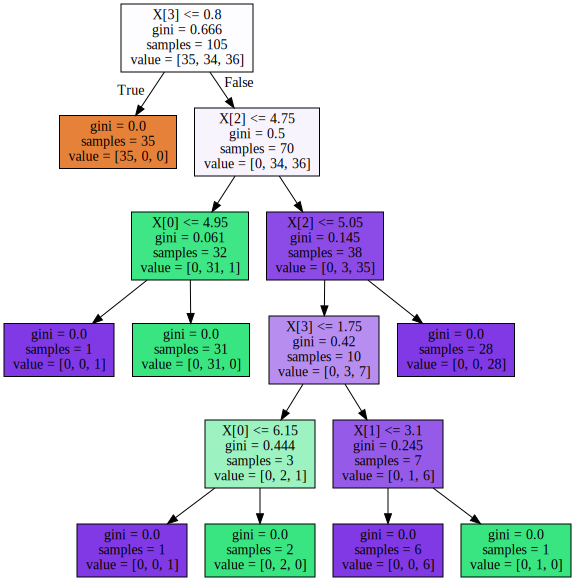

In [45]:
grafico

In [46]:
plano_previsto = classificador_arvore.predict(x_teste)

In [47]:
plano_previsto

array([2, 1, 3, 3, 1, 1, 2, 1, 2, 1, 2, 1, 1, 3, 2, 3, 2, 3, 1, 3, 3, 2,
       3, 3, 3, 1, 2, 1, 2, 3, 3, 2, 3, 2, 1, 2, 3, 2, 1, 3, 1, 1, 3, 1,
       2])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


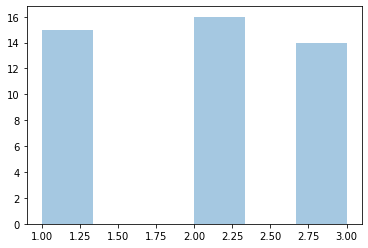

In [48]:
sns.distplot(y_teste, bins = 6, kde = False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


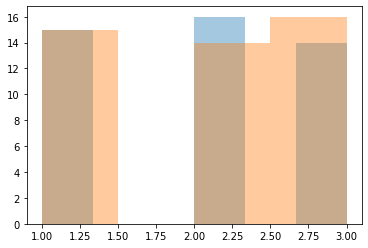

In [49]:
sns.distplot(y_teste, bins = 6, kde = False)
sns.distplot(plano_previsto, bins = 4, kde = False)

In [50]:
from sklearn.metrics import accuracy_score

accuracy_score(y_teste, plano_previsto) * 100

95.55555555555556

In [51]:
from sklearn.neighbors import KNeighborsClassifier

classificador_vizinho = KNeighborsClassifier(5)

In [52]:
classificador_vizinho.fit(x_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [53]:
classificador_vizinho.predict(x_teste)

array([2, 1, 3, 3, 1, 1, 2, 1, 2, 1, 2, 1, 1, 3, 2, 3, 2, 3, 1, 3, 3, 2,
       3, 3, 3, 1, 2, 1, 2, 2, 3, 2, 3, 2, 1, 2, 3, 2, 1, 3, 1, 1, 3, 1,
       2])

In [54]:
plano_previsto_v = classificador_vizinho.predict(x_teste)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


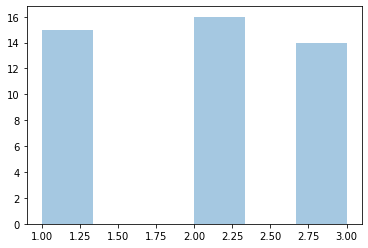

In [55]:
sns.distplot(y_teste, bins = 6, kde = False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


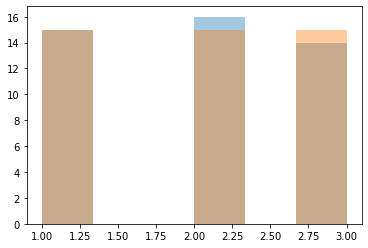

In [56]:
sns.distplot(y_teste, bins = 6, kde = False)
sns.distplot(plano_previsto_v, bins = 6, kde = False)

In [57]:
accuracy_score(y_teste, plano_previsto_v) * 100

97.77777777777777

In [58]:
plano_previsto_v

array([2, 1, 3, 3, 1, 1, 2, 1, 2, 1, 2, 1, 1, 3, 2, 3, 2, 3, 1, 3, 3, 2,
       3, 3, 3, 1, 2, 1, 2, 2, 3, 2, 3, 2, 1, 2, 3, 2, 1, 3, 1, 1, 3, 1,
       2])

In [59]:
plano_previsto_v2 = classificador_vizinho.predict(x_treino)

In [60]:
accuracy_score(y_treino, plano_previsto_v2) * 100

96.19047619047619

In [61]:
from sklearn.model_selection import RepeatedStratifiedKFold

skfold = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10, random_state = 10)

In [62]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [5]}

gs = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, cv = skfold, verbose = 1, scoring = "accuracy", return_train_score = True)

In [63]:
gs.fit(x, y)

Fitting 100 folds for each of 1 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=10),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None, param_grid={'n_neighbors': [5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [64]:
gs.cv_results_['mean_test_score']

array([0.96533333])

# **Aula 04 Clustering**

In [65]:
engajamento = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/curso_scikitlearn/aula4/Engajamento.csv")

In [66]:
engajamento.head(10)

,Horas,Taxa de Cliques,Classe
0,1007.084589,1.582099,1
1,1005.886193,1.524809,1
2,1005.609471,0.846857,1
3,989.814354,2.841944,2
4,995.328807,3.569900,3
5,1007.122707,1.510663,1
6,996.717789,16.129410,0
7,990.871518,3.313321,2
8,997.425243,16.065154,0
9,989.730475,3.700035,2


In [67]:
x = engajamento.iloc[:,:-1]
x

,Horas,Taxa de Cliques
0,1007.084589,1.582099
1,1005.886193,1.524809
2,1005.609471,0.846857
3,989.814354,2.841944
4,995.328807,3.569900
...,...,...
4995,991.447007,5.428443
4996,996.841049,15.504041
4997,991.723479,4.750185
4998,996.695706,14.807956


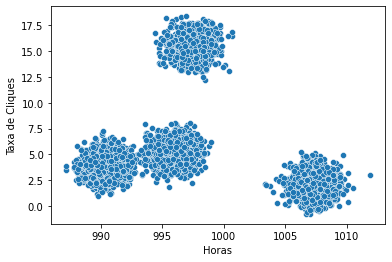

In [68]:
sns.scatterplot(x = "Horas", y = "Taxa de Cliques", data = engajamento)

In [69]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 0)

In [70]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [71]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [72]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

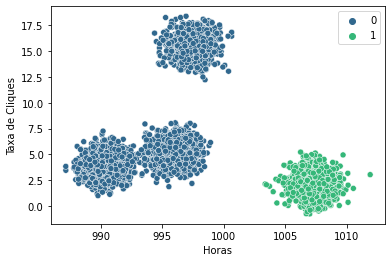

In [73]:
sns.scatterplot(x = "Horas", y = "Taxa de Cliques", 
                data = x, hue = kmeans.labels_, 
                palette = "viridis")

In [74]:
kmeans = KMeans(n_clusters = 4, random_state = 0)

In [75]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

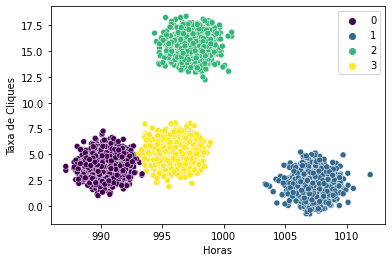

In [76]:
sns.scatterplot(x = "Horas", y = "Taxa de Cliques", 
                data = x, hue = kmeans.labels_, 
                palette = "viridis")

In [77]:
from sklearn.cluster import OPTICS

clustering_optics = OPTICS(min_samples = 8).fit(x)

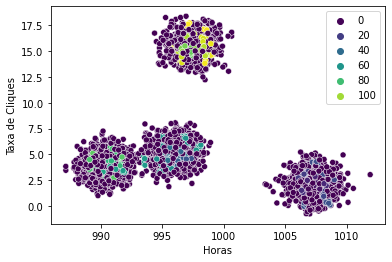

In [78]:
sns.scatterplot(x = "Horas", y = "Taxa de Cliques", data = x, hue = clustering_optics.labels_, palette = "viridis")

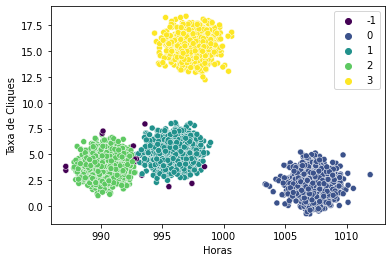

In [79]:
clustering_optics = OPTICS(min_samples = 80).fit(x)

sns.scatterplot(x = "Horas", y = "Taxa de Cliques", data = x, hue = clustering_optics.labels_, palette = "viridis")

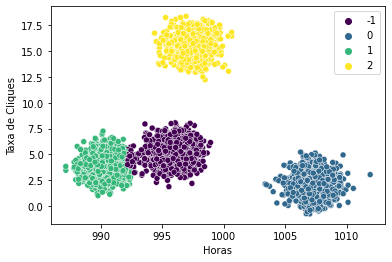

In [80]:
clustering_optics = OPTICS(min_samples = 800).fit(x)

sns.scatterplot(x = "Horas", y = "Taxa de Cliques", data = x, hue = clustering_optics.labels_, palette = "viridis")

# **Aula 05 Visão Geral**

In [90]:
from sklearn import metrics

In [91]:
Classe_conhecida = engajamento['Classe']

In [93]:
Classe_estimada = clustering_optics.labels_

In [94]:
metrics.adjusted_rand_score(Classe_conhecida, Classe_estimada)

0.9821047486293407

In [95]:
Classe_estimada = kmeans.labels_

In [96]:
metrics.adjusted_rand_score(Classe_conhecida, Classe_estimada)

0.9957444328155858

In [98]:
metrics.silhouette_score(x, kmeans.labels_, metric = 'euclidean')

0.7640009351490763

In [100]:
metrics.silhouette_score(x, clustering_optics.labels_, metric = 'euclidean')

0.7590075270703337

**FIM**